In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs

from pandas.plotting import parallel_coordinates

#X, y = make_blobs(n_samples=200, centers=3, n_features=2, random_state=0)

#plt.scatter(X[:,0], X[:,1], c=y)
#plt.show()

C:\Users\thaer\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


           f1        f2        f3        f4        f5        f6        f7  \
0    0.052632  0.285714  0.000000  0.113095  0.085575  0.000000  0.000000   
1    0.090226  0.142857  0.482759  0.130952  0.056235  0.000000  0.111842   
2    0.518797  0.000000  0.000000  0.214286  0.484108  0.299717  0.131579   
3    0.368421  0.285714  0.068966  0.250000  0.244499  0.151273  0.217105   
4    0.007519  0.000000  0.000000  0.065476  0.002445  0.000000  0.072368   
..        ...       ...       ...       ...       ...       ...       ...   
880  0.015038  0.428571  0.000000  0.101190  0.061125  0.000129  0.006579   
881  0.045113  0.142857  0.000000  0.035714  0.048900  0.000000  0.039474   
882  0.052632  0.571429  0.000000  0.029762  0.044010  0.000000  0.006579   
883  0.007519  0.000000  0.000000  0.000000  0.004890  0.000000  0.000000   
884  0.270677  0.000000  0.000000  0.053571  0.244499  0.000000  0.006579   

           f8     f9       f10  ...       f12       f13       f14       f15

C:\Users\thaer\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
C:\Users\thaer\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


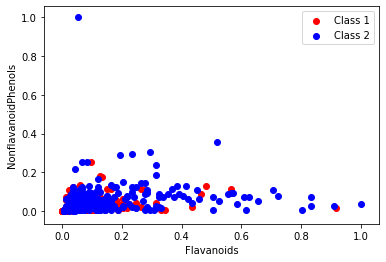

In [42]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
url = 'datasets/xalan-26.csv'
# ant17  camel10  camel12 camel-14  camel-16  jedit-32  jedit-40  jedit-41  jedit-42   jedit-43  log4j-10  log4j-11  lucene-20 
# xalan-24   xalan-25  xalan-26
cols =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols', 
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity', 
         'Hue', 'OD280/OD315', 'Proline']
#data = pd.read_csv(url, names=cols)
data = pd.read_csv(url)

y = data['class']          # Split off classifications
X = data.ix[:, 'f1':] # Split off features

print(X)

# three different scatter series so the class labels in the legend are distinct
plt.scatter(X[y==0]['f1'], X[y==0]['f19'], label='Class 1', c='red')
plt.scatter(X[y==1]['f1'], X[y==1]['f19'], label='Class 2', c='blue')
#plt.scatter(X[y==3]['Flavanoids'], X[y==3]['NonflavanoidPhenols'], label='Class 3', c='lightgreen')

# Prettify the graph
plt.legend()
plt.xlabel('Flavanoids')
plt.ylabel('NonflavanoidPhenols')

# display
plt.show()

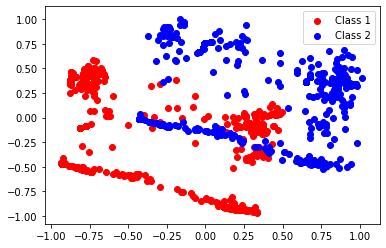

In [43]:
X_norm = (X - X.min())/(X.max() - X.min())

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='blue')
#plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')

plt.legend()
plt.show()

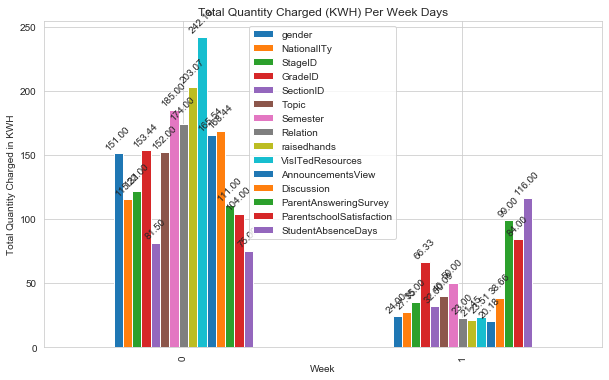

In [7]:
def plot_value_labels(axis):
    rects = axis.patches

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        label = '{:.2f}'.format(y_value)

        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Create annotation
        axis.annotate(label, (x_value, y_value), 
                      xytext=(0, 2), 
                      textcoords="offset points", 
                      ha='center', 
                      rotation=45, 
                      va=va)

url = 'datasets/St_Data3.csv'
data = pd.read_csv(url)

fig = plt.figure(figsize=(10,6))
ax = fig.gca()
sns.set_style("whitegrid")
counts= data.groupby('Class').sum()
counts.plot.bar(ax=ax)
ax.set_title('Total Quantity Charged (KWH) Per Week Days')
ax.set_xlabel('Week')
ax.set_ylabel('Total Quantity Charged in KWH')
plot_value_labels(fig.gca())

(480, 16)
[0 1]
Class
0    353
1    127
dtype: int64


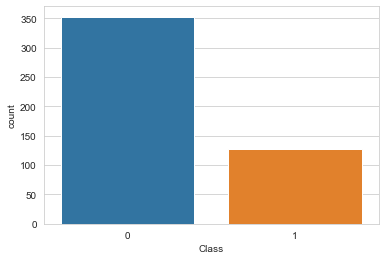

In [10]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
url = 'datasets/St_Data3.csv'
data = pd.read_csv(url)

data.head()
print(data.shape)
print(data['Class'].unique())
print(data.groupby('Class').size())

import seaborn as sns
sns.countplot(data['Class'],label="Count")
plt.show()